<a href="https://colab.research.google.com/github/OjosDelSol/Main/blob/main/BangladeshMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the financial cost of sea-level rise coastal flooding in Barisal, Bangladesh

**This Project is Work In Progress**

The intention here is to overlay building data and flood plain data over the Barisal Division of Bangladesh in order to estimate a financial cost that will be incurred on the Bangladeshi Government based on how many buildings within the region are inundated with costal flooding and need to be rebuilt or repaired within the region. A fix cost will be associated with the buildings based on their total area. Buildings will be considered damaged/destroyed if they are inundated with flooding, regarldess of the depth of the flood; if no flood inundates a building, then it will not be included in the final cost.

In [ ]:
from google.colab import files
uploaded = files.upload()

# Upload GADM building files and JSON file at level 1

In [ ]:
import geopandas as gdp
barisal = gdp.read_file('gis_osm_buildings_a_free_1.shp', crs = 'epsg: 4326')
barisal

In [ ]:
barisal.plot(alpha = 0.5, edgecolor = 'k')

In [ ]:
import geopandas as gdp1
gadm = gdp1.read_file('gadm41_BGD_1.json', crs = 'epsg: 4326')
gadm

In [ ]:
gadm_boundaries = gadm[gadm['GID_2'] == 'TGO.3.6_2']
gadm_boundaries
# GID_2 = TGO.3.6_2


In [ ]:
gadm_boundaries.plot(alpha = 0.5, edgecolor = 'k')

In [ ]:
gadm_barisal = barisal.overlay(gadm_boundaries, how = 'intersection')
gadm_boundaries.plot(alpha = 0.5, edgecolor = 'k')
gadm_barisal.plot(alpha = 0.5, edgecolor = 'k')

In [ ]:
gadm_boundaries = gadm_boundaries.to_crs('epsg: 3857')
gadm_boundaries['area_km2'] = gadm_boundaries['geometry'].area / 1e6
gadm_boundaries

In [ ]:
gadm_boundaries.to_file('barisal_buildings.shp', crs='epsg:4326')

In [ ]:
gadm_boundaries = gadm_boundaries.to_crs('epsg: 4326') # I need to re-specify the coordinate system for this variable
lome_railways_subset = lome_railways.overlay(gadm_boundaries, how = 'intersection')
lome_railways_subset.plot(alpha = 0.5, edgecolor = 'k')

Text(0, 0.5, 'Cost (dollars)')

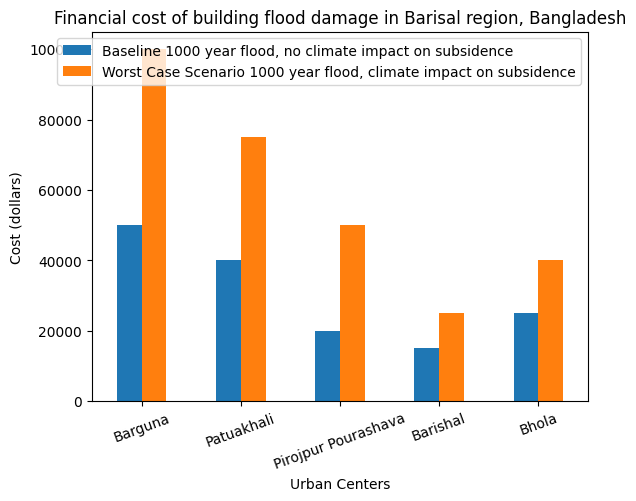

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


baseline = [50000, 40000, 20000, 15000, 25000]
rcp8_5 = [100000, 75000, 50000, 25000, 40000]
route = ['Barguna', 'Patuakhali', 'Pirojpur Pourashava', 'Barishal', 'Bhola']


df = pd.DataFrame({'Baseline 1000 year flood, no climate impact on subsidence': baseline,
                   'Worst Case Scenario 1000 year flood, climate impact on subsidence': rcp8_5}, index=route)


df.plot.bar(
    title="Financial cost of building flood damage in Barisal region, Bangladesh",
    rot=20
)
plt.xlabel('Urban Centers')
plt.ylabel('Cost (dollars)')

Text(0, 0.5, 'Cost (dollars)')

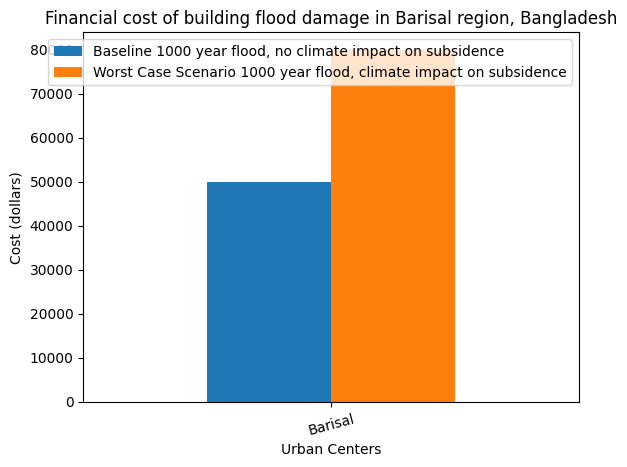

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


baseline = 50000
rcp8_5 = 80000
route = ['Barisal']


df = pd.DataFrame({'Baseline 1000 year flood, no climate impact on subsidence': baseline,
                   'Worst Case Scenario 1000 year flood, climate impact on subsidence': rcp8_5}, index=route)


df.plot.bar(
    title="Financial cost of building flood damage in Barisal region, Bangladesh",
    rot= 15
)
plt.xlabel('Urban Centers')
plt.ylabel('Cost (dollars)')